# Spectral Algorithm for Planted Clique

In [124]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Planted Clique Input

Begin by generating a planted clique input. We start with a $G_{n,1/2}$ graph and plant a clique of size $k$:

In [125]:
def gen_planted_clique(n, k):
    G = nx.erdos_renyi_graph(n, 1/2)
    clique = np.random.choice(n, k, replace=False)
    for i in clique:
        for j in clique:
            G.add_edge(i, j)
    return G

In [126]:
G = gen_planted_clique(200, 50)

When $n=200$ and $k=50$, the clique is (maybe surprisingly) not visible to the naked eye, even with the default spring layout.

In [127]:
def visualize_graph(G, node_color='r', edge_color='k', width=0.5, alpha=1):
    plt.figure(figsize=(15, 12))
    nx.draw_networkx(G, node_color=node_color, edge_color=edge_color, width=width, alpha=alpha)

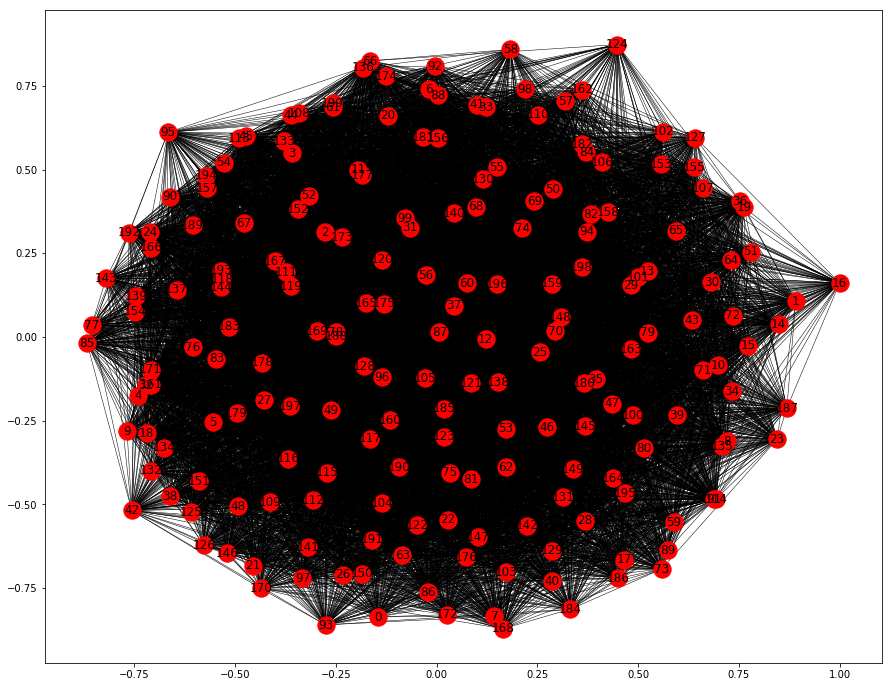

In [128]:
visualize_graph(G)

## The Spectral Algorithm

We can use the spectral algorithm of Alon, Krivelevich, and Sudakov to find the planted clique. In short, we use the fact that the largest eigenvector of $M=A-\dfrac{1}{2}J$, with $A$ the adjacency matrix and $J$ all ones, is with high probability close to the indicator vector for the clique.

In [129]:
def find_clique_aks(G, n, k):
    A = nx.adjacency_matrix(G).toarray()
    #print(A)
    M = A - 1/2 * np.ones((n, n))
    lam, v = np.linalg.eig(M)
    x = v[:,lam.tolist().index(max(lam))]
    x = [abs(i) for i in x.tolist()]
    largest = sorted(x, reverse=True)[:k]
    I = [x.index(l) for l in largest]
    adj = np.array([1 if i in I else 0 for i in range(n)])
    A_adj = (A @ adj).tolist()
    return [i for i in range(n) if A_adj[i] >= 0.75 * k]

In [130]:
clique = find_clique_aks(G, 200, 50)

Let's visualize the results:

In [137]:
def visualize_clique(G, clique):
    clique_edges = G.subgraph(clique).edges()
    node_color = ['r' if n in clique else 'k' for n in G.nodes()]
    edge_color = ['r' if e in clique_edges else 'k' for e in G.edges()]
    width = [1 if e in clique_edges else 0.2 for e in G.edges()]
    visualize_graph(G, node_color=node_color, edge_color=edge_color, width=width, alpha=0.8)

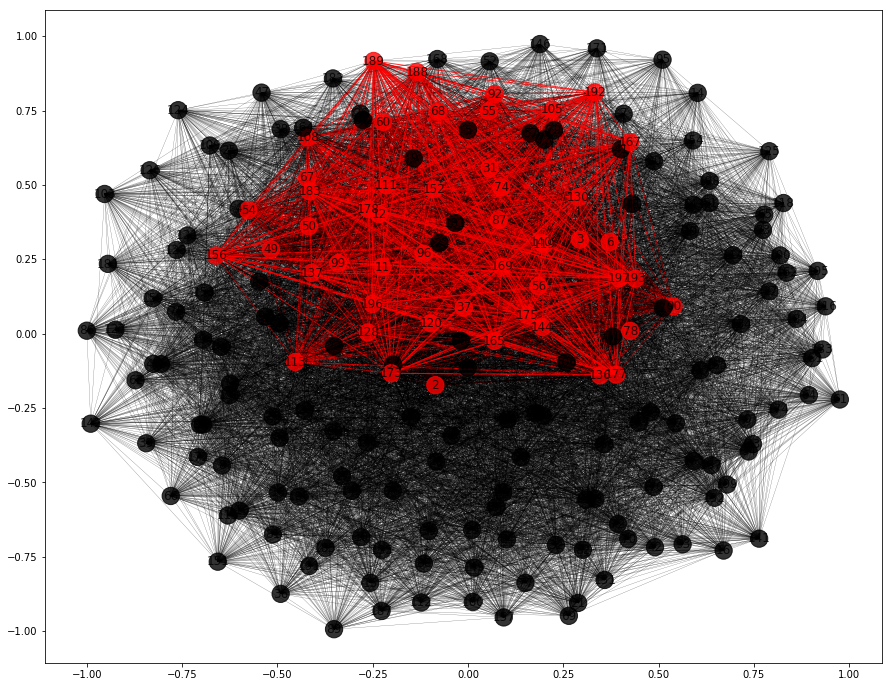

In [138]:
visualize_clique(G, clique)

And check that we indeed have a clique:

In [133]:
def is_clique(G, clique):
    for i in clique:
        for j in clique:
            if (i, j) not in G.edges():
                return False
    return True

In [134]:
is_clique(G, clique)

True